# CPD using TIRE

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.models import Model

import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences
import warnings
import time, copy

import utils
import TIRE
import simulate

## Set parameters

In [2]:
window_size = 20
domain = "both" #choose from: TD (time domain), FD (frequency domain) or both

#parameters TD
intermediate_dim_TD=0
latent_dim_TD=1 #h^TD in paper
nr_shared_TD=1 #s^TD in paper
K_TD = 2 #as in paper
nr_ae_TD= K_TD+1 #number of parallel AEs = K+1
loss_weight_TD=1 #lambda_TD in paper

#parameters FD
intermediate_dim_FD=10
latent_dim_FD=1 #h^FD in paper
nr_shared_FD=1 #s^FD in paper
K_FD = 2 #as in paper
nr_ae_FD=K_FD+1 #number of parallel AEs = K+1
loss_weight_FD=1 #lambda^FD in paper
nfft = 30 #number of points for DFT
norm_mode = "timeseries" #for calculation of DFT, should the timeseries have mean zero or each window?

## Generate data

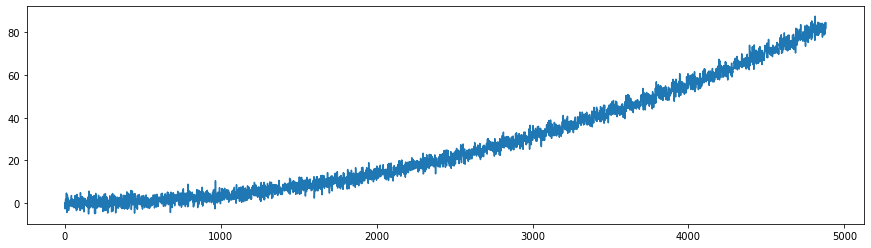

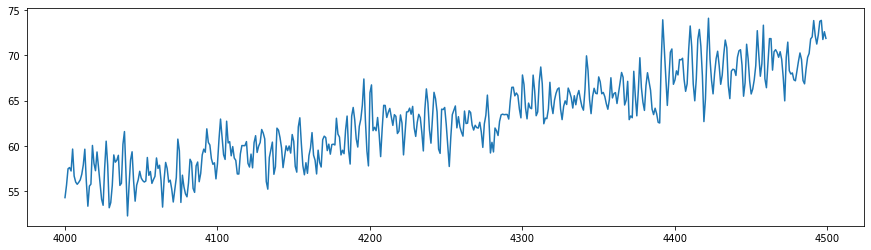

In [3]:
timeseries, windows_TD, parameters = simulate.generate_jumpingmean(window_size)
windows_FD = utils.calc_fft(windows_TD, nfft, norm_mode)

plt.figure(figsize=(15,4))
plt.plot(timeseries)
plt.show()
plt.figure(figsize=(15,4))
plt.plot(range(4000,4500),timeseries[4000:4500])
plt.show()

## Train the autoencoders

In [4]:
shared_features_TD = TIRE.train_AE(windows_TD, intermediate_dim_TD, latent_dim_TD, nr_shared_TD, nr_ae_TD, loss_weight_TD)
shared_features_FD = TIRE.train_AE(windows_FD, intermediate_dim_FD, latent_dim_FD, nr_shared_FD, nr_ae_FD, loss_weight_FD)

W0822 21:46:38.671269 4561763776 training_utils.py:1348] Output dense_2 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to dense_2.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3, 20)]      0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 3, 1)         21          input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 3, 0)         0           input_1[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_concat (TensorFlowO [(None, 3, 1)]       0           dense[0][0]                      
                                                                 dense_1[0][0]                

4861/4861 [==============================] - 0s 21us/sample - loss: 0.0061
Epoch 77/200
4861/4861 [==============================] - 0s 20us/sample - loss: 0.0061
Epoch 78/200
4861/4861 [==============================] - 0s 20us/sample - loss: 0.0060
Epoch 79/200
4861/4861 [==============================] - 0s 20us/sample - loss: 0.0060
Epoch 80/200
4861/4861 [==============================] - 0s 20us/sample - loss: 0.0059
Epoch 81/200
4861/4861 [==============================] - 0s 20us/sample - loss: 0.0059
Epoch 82/200
4861/4861 [==============================] - 0s 20us/sample - loss: 0.0058
Epoch 83/200
4861/4861 [==============================] - 0s 21us/sample - loss: 0.0058
Epoch 84/200
4861/4861 [==============================] - 0s 20us/sample - loss: 0.0058
Epoch 85/200
4861/4861 [==============================] - 0s 20us/sample - loss: 0.0057
Epoch 86/200
4861/4861 [==============================] - 0s 18us/sample - loss: 0.0057
Epoch 87/200
4861/4861 [=====================

4861/4861 [==============================] - 0s 20us/sample - loss: 0.0044
Epoch 169/200
4861/4861 [==============================] - 0s 20us/sample - loss: 0.0043
Epoch 170/200
4861/4861 [==============================] - 0s 21us/sample - loss: 0.0043
Epoch 171/200
4861/4861 [==============================] - 0s 20us/sample - loss: 0.0044
Epoch 172/200
4861/4861 [==============================] - 0s 20us/sample - loss: 0.0044
Epoch 173/200
4861/4861 [==============================] - 0s 20us/sample - loss: 0.0043
Epoch 174/200
4861/4861 [==============================] - 0s 20us/sample - loss: 0.0043
Epoch 175/200
4861/4861 [==============================] - 0s 20us/sample - loss: 0.0043
Epoch 176/200
4861/4861 [==============================] - 0s 20us/sample - loss: 0.0043
Epoch 177/200
4861/4861 [==============================] - 0s 20us/sample - loss: 0.0043
Epoch 178/200
4861/4861 [==============================] - 0s 20us/sample - loss: 0.0043
Epoch 179/200
4861/4861 [==========

W0822 21:46:59.967866 4561763776 training_utils.py:1348] Output dense_7 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to dense_7.


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 3, 16)]      0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 3, 10)        170         input_3[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 3, 1)         11          dense_3[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 3, 0)         0           dense_3[0][0]                    
____________________________________________________________________________________________

4861/4861 [==============================] - 0s 23us/sample - loss: 2.6180e-04
Epoch 71/200
4861/4861 [==============================] - 0s 36us/sample - loss: 2.6066e-04
Epoch 72/200
4861/4861 [==============================] - 0s 26us/sample - loss: 2.5987e-04
Epoch 73/200
4861/4861 [==============================] - 0s 26us/sample - loss: 2.5865e-04
Epoch 74/200
4861/4861 [==============================] - 0s 23us/sample - loss: 2.5725e-04
Epoch 75/200
4861/4861 [==============================] - 0s 23us/sample - loss: 2.5638e-04
Epoch 76/200
4861/4861 [==============================] - 0s 20us/sample - loss: 2.5519e-04
Epoch 77/200
4861/4861 [==============================] - 0s 24us/sample - loss: 2.5449e-04
Epoch 78/200
4861/4861 [==============================] - 0s 24us/sample - loss: 2.5349e-04
Epoch 79/200
4861/4861 [==============================] - 0s 21us/sample - loss: 2.5231e-04
Epoch 80/200
4861/4861 [==============================] - 0s 22us/sample - loss: 2.5207e-04
E

4861/4861 [==============================] - 0s 23us/sample - loss: 2.3012e-04
Epoch 159/200
4861/4861 [==============================] - 0s 25us/sample - loss: 2.3017e-04
Epoch 160/200
4861/4861 [==============================] - 0s 35us/sample - loss: 2.3000e-04
Epoch 161/200
4861/4861 [==============================] - 0s 27us/sample - loss: 2.3035e-04
Epoch 162/200
4861/4861 [==============================] - 0s 22us/sample - loss: 2.2971e-04
Epoch 163/200
4861/4861 [==============================] - 0s 20us/sample - loss: 2.2987e-04
Epoch 164/200
4861/4861 [==============================] - 0s 23us/sample - loss: 2.3021e-04
Epoch 165/200
4861/4861 [==============================] - 0s 23us/sample - loss: 2.3007e-04
Epoch 166/200
4861/4861 [==============================] - 0s 24us/sample - loss: 2.2969e-04
Epoch 167/200
4861/4861 [==============================] - 0s 20us/sample - loss: 2.3009e-04
Epoch 168/200
4861/4861 [==============================] - 0s 23us/sample - loss: 2.

## Postprocessing and peak detection

In [5]:
#we calculate the smoothened dissimilarity measure and the corresponding prominence-based change point scores
dissimilarities = TIRE.smoothened_dissimilarity_measures(shared_features_TD, shared_features_FD, domain, window_size)
change_point_scores = TIRE.change_point_score(dissimilarities, window_size)

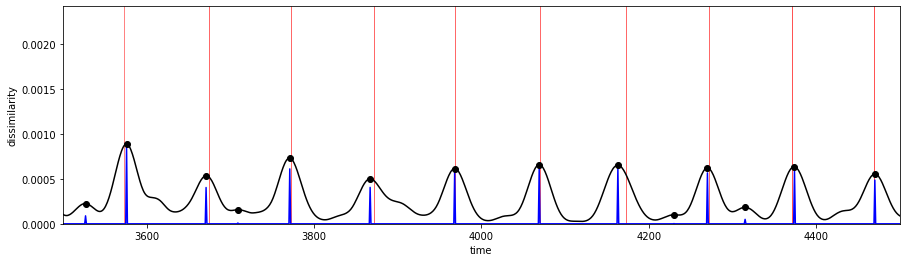

[0.526812379500569, 0.8739682909200136, 0.9155921496541268]


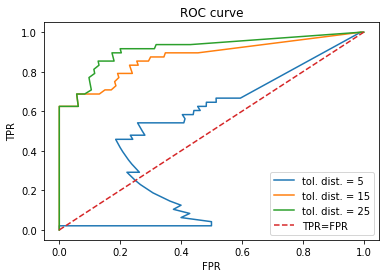

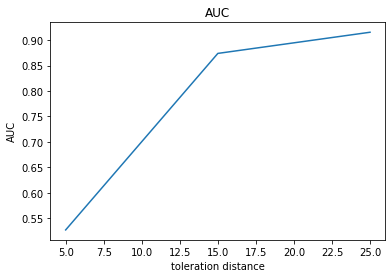

In [6]:
#parameters for plot
time_start = 3500
time_stop = 4500
plot_prominences = True

utils.plot_cp(dissimilarities, parameters, window_size, time_start, time_stop, plot_prominences)

#parameters for AUC calculation
tol_distances = [5,15,25]
auc = utils.get_auc(dissimilarities,tol_distances, parameters, window_size)